# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 
It's a classification problem as the goal of this project is to separate students into categories (those who pass and those who fail). Moreover, it's binary classification problem as there are only two classes.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Set reandom state
random_state = 37

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# Calculate number of students
n_students = len(student_data)

# Calculate number of features
n_features = len(student_data.columns) - 1

# Calculate passing students
n_passed = sum(1 for passed in student_data["passed"] if passed == "yes")

# Calculate failing students
n_failed = sum(1 for passed in student_data["passed"] if passed == "no")

# Calculate graduation rate
grad_rate = 100 * float(n_passed) / n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# Import any additional functionality you may need here
from sklearn.cross_validation import StratifiedShuffleSplit as shuffle_split

# Set the number of training points
num_train = 300

# Shuffle and split the dataset into the number of training and testing points above
shuffled = shuffle_split(y_all.as_matrix(), 1, None, num_train, random_state)
for train_index, test_index in shuffled:
    X_train, y_train = X_all.loc[train_index], y_all.loc[train_index]
    X_test, y_test = X_all.loc[test_index], y_all.loc[test_index]

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: ** As it was hard for me to choose only 3 algorithms just by looking at the data I tried a few more:
- **Naive Bayes**
    - **pros**
        - fast and simple
    - **cons**
        - assumes that features are independent (so some additional work on features may be required)
        - can not fit the complex hypothesis
- **KNeighborsClassifier**
    - **pros**
        - takes little time to fit
        - may show good result 
    - **cons**
        - takes significant time to predict
- **Support Vector Machines**
    - **pros**
        - effective for a big number of features
        - may be very effective on complex data using different kernels
    - **cons**
        - slow when kernel other than linear is used
- **Decision Tree**
    - **pros**
        - fast
        - selects most important features first
    - **cons**
        - easy to overfit
        - may end up in a local minimum
- **Random Forest**
    - **pros**
        - uses multiple Decision Trees to avoid overfitting
    - **cons**
        - slow comparing to **DecisionTreeClassifier**
- **Gradient Boosting**
    - **pros**
        - hard to overfit
        - improves with every additional train point
    - **cons**
        - slow training comparing to other algorithms      
        
After doing training and testing on these models with the default parameters I decided to choose following models:
- **GaussianNB** - fast in both training and testing. Accuracy is moderate and could be improved by additional filtering/analysis on features in my opinion.
- **SVC** - shows very good results and can be even tuned further. But both training and testing time are high.
- **DecisionTreeClassifier** - fast in both training and testing. But apparently it overfits with the default parameters. It can be significantly improved by parameters tuning.

Other 3 were discarded becaouse of:
- **KNeighborsClassifier** - takes same time to predict as SVC but accurecy is worse.
- **RandomForestClassifier**, **GradientBoostingClassifier** - take much more time to train and predict.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    time_spent = time() - start
    
    # Return train time
    return time_spent


def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    time_spent = time() - start
    
    # Return both score and predict time
    return (f1_score(target.values, y_pred, pos_label='yes'), time_spent)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Train the classifier
    train_time = train_classifier(clf, X_train, y_train)
    
    # Predict on train data
    train_result = predict_labels(clf, X_train, y_train)
    
    # Predict on test data
    test_result = predict_labels(clf, X_test, y_test)
    
    # Return train time, train and test result
    return (train_time, train_result, test_result)

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [7]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the three models
clf_models = [GaussianNB(), 
              KNeighborsClassifier(),
              SVC(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), 
              RandomForestClassifier(random_state=random_state),
              GradientBoostingClassifier(random_state=random_state)]

# Set up the training set sizes
train_data = []
for train_size in [100, 200, 300]:
        train_data.append((X_train[:train_size], y_train[:train_size]))
        
# Execute the 'train_predict' function for each classifier and each training set size
for clf in clf_models:    
    print clf.__class__.__name__
    print " ===================================================="
    print "|    train      | predict on train | predict on test |"
    print "| size |  time  |  time  |  score  |  time  |  score |"
    print " ===================================================="
    for X_train, y_train in train_data:
        stat = train_predict(clf, X_train, y_train, X_test, y_test)
        print "|  {} |".format(len(X_train)), "{:.4f} |".format(stat[0]), \
            "{:.4f} |".format(stat[1][1]), " {:.4f} |".format(stat[1][0]), \
            "{:.4f} |".format(stat[2][1]), "{:.4f} |".format(stat[2][0])
    print " ===================================================="

GaussianNB
|    train      | predict on train | predict on test |
| size |  time  |  time  |  score  |  time  |  score |
|  100 | 0.0034 | 0.0007 |  0.8000 | 0.0013 | 0.6446 |
|  200 | 0.0016 | 0.0005 |  0.8116 | 0.0003 | 0.6446 |
|  300 | 0.0009 | 0.0005 |  0.8028 | 0.0004 | 0.7176 |
KNeighborsClassifier
|    train      | predict on train | predict on test |
| size |  time  |  time  |  score  |  time  |  score |
|  100 | 0.0011 | 0.0021 |  0.8030 | 0.0016 | 0.7188 |
|  200 | 0.0006 | 0.0037 |  0.8600 | 0.0018 | 0.7826 |
|  300 | 0.0009 | 0.0072 |  0.8616 | 0.0027 | 0.8286 |
SVC
|    train      | predict on train | predict on test |
| size |  time  |  time  |  score  |  time  |  score |
|  100 | 0.0023 | 0.0020 |  0.8444 | 0.0022 | 0.7287 |
|  200 | 0.0084 | 0.0061 |  0.8525 | 0.0027 | 0.7755 |
|  300 | 0.0131 | 0.0110 |  0.8720 | 0.0048 | 0.8212 |
DecisionTreeClassifier
|    train      | predict on train | predict on test |
| size |  time  |  time  |  score  |  time  |  score |
|  100

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Gaussian Naive Bayes Classifier**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0004                  | 0.0003                 | 0.8000           | 0.6446          |
| 200               | 0.0006                  | 0.0005                 | 0.8116           | 0.6446          |
| 300               | 0.0006                  | 0.0006                 | 0.8028           | 0.7176          |

** Classifer 2 - Support Vector Classifier**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0017                  | 0.0016                 | 0.8444           | 0.7287          |
| 200               | 0.0059                  | 0.0033                 | 0.8525           | 0.7755          |
| 300               | 0.0110                  | 0.0036                 | 0.8720           | 0.8212          |

** Classifer 3 - Decision Tree Classifier**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0002                  | 0.0002                 | 1.0000           | 0.6552          |
| 200               | 0.0002                  | 0.0002                 | 1.0000           | 0.7231          |
| 300               | 0.0004                  | 0.0002                 | 1.0000           | 0.7244          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** I would choose SVM classifier if I only needed to care about an accuracy of the model. On the other hand I would choose Naive Bayes classifier if I could not tune the classifier further as it is fast and shows good performace out of the box. But being able to tune and keeping in mind limited resources I decided to take and tune Decision Tree classifier. Despite bad results with the default parameters, it shows very good speed and can be easily improved by tuning. Most likely, it won't show the best results after tuning but will cost much less than other classifiers.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: ** 
A decision tree classifies data by asking a series of questions about the features for a specific item. So it is a tree where nodes are conditions (usually yes-no questions) and leaves are classes. Also, it's important that questions that give more information should go first.

To build such tree following steps should be performed:
- Find the best feature and it's value to split train data into 2 groups. As a result, we want to get groups where items in each group are similar (ideally all items in a group belongs to one class).
- Repeat step 1 for each of the groups using the remaining features.
- Stop when we are satisfied with the resulted tree. For example:
    - we have groups where each group contains only instances of one class
    - all features have been used
    - the tree reaches desired depth
    - etc

When we need to make a prediction we can traverse the tree by following а path where all conditions are satisfied for the given point. Final leaf will be the most probable class for the point.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

Tuned model has a training F1 score of 0.8119.
Tuned model has a testing F1 score of 0.8085.


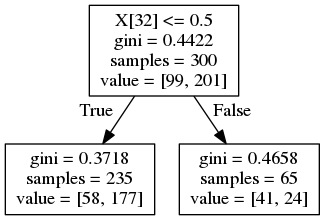

In [8]:
# Import 'gridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# Create the parameters list you wish to tune
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [1, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 2, 5, 10, 20]}

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=0)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
train_result = predict_labels(clf, X_train, y_train)
test_result = predict_labels(clf, X_test, y_test)
print "Tuned model has a training F1 score of {:.4f}.".format(train_result[0])
print "Tuned model has a testing F1 score of {:.4f}.".format(test_result[0])

# Display tuned decision tree
from StringIO import StringIO
from pydot import graph_from_dot_data
from IPython.display import Image, display  

try:
    from StringIO import StringIO
    from pydot import graph_from_dot_data
    from sklearn.tree import export_graphviz
    from IPython.display import Image, display  

    dot_data = StringIO()  
    export_graphviz(clf, out_file=dot_data)  
    graph = graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
except:
    None

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** 
- Tuned model has a training F1 score of **0.8119**. 
- Tuned model has a testing F1 score of **0.8085**.

The training score is much lower and the testing score is higher that it was before tuning. It shows that the model is not suffering from high variance as it was before. And it appears that tuned tree uses only one feature - *"failures"*.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.